In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.CRIM per capita crime rate by town
2.ZN proportion of residential land zoned for lots over 25,000 sq.ft.
3.INDUS proportion of non-retail business acres per town
4.CHAS Charles River dummy variable (= 1 if tract bounds
          river; 0 otherwise)
5.NOX nitric oxides concentration (parts per 10 million)
6.RM average number of rooms per dwelling
7.AGE proportion of owner-occupied units built prior to 1940
8.DIS weighted distances to five Boston employment centres
9.RAD index of accessibility to radial highways
10.TAX full-value property-tax rate per $10,000 11.PTRATIO pupil-teacher ratio by town 12.B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
11.LSTAT % lower status of the population
12.MEDV Median value of owner-occupied homes in $1000's

In [16]:
data = pd.read_csv("bostonhousing.csv",sep='\t')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
data.isnull().sum().sum()

0

In [10]:
data.dtypes


crim\tzn\tindus\tchas\tnox\trm\tage\tdis\trad\ttax\tptratio\tb\tlstat\tmedv    object
dtype: object

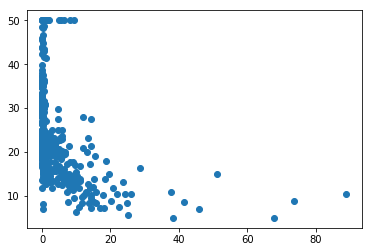

In [17]:
plt.scatter(data['crim'],data['medv'])

In [18]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


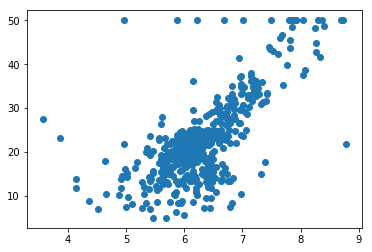

In [19]:
# Positive correlation --> 0.695360
plt.scatter(data['rm'],data['medv'])

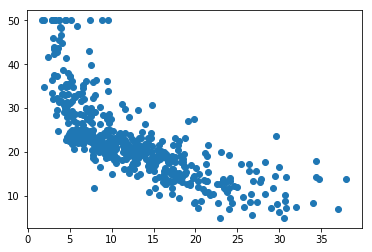

In [20]:
# Negative correlation --> -0.737663	
plt.scatter(data['lstat'],data['medv'])

In [21]:
y_pred = np.array([23,34,27,78,99.3]) 
y_obs = np.array([25,32,25.5,77,95])
# mean squared error(MSE)
np.mean((y_pred-y_obs)**2)

5.947999999999995

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_obs)

5.947999999999995

In [23]:
# Root mean squared error(RMSE)
np.sqrt(np.mean((y_pred-y_obs)**2))

2.438852189043033

In [24]:
# Mean Absolute error
np.sqrt(np.mean(np.abs(y_pred-y_obs)))

1.4696938456699067

##### Create a model with single feature lstat and target is medv

In [25]:
# Get the featrure data as a dataframe
x_data = data[['lstat']]
y_data = data['medv']

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

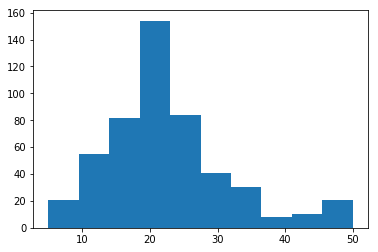

In [26]:
# observe the histogram of the target column
plt.hist(y_data)

In [27]:
# Divide the data for tarining and testing
# train_test_split and use test_size as 0.2
# 20% for testing and 80% for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2)
print(x_train.shape)
print(y_train.shape)

(404, 1)
(404,)


In [28]:
x_data.shape[0]*0.8

404.8

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

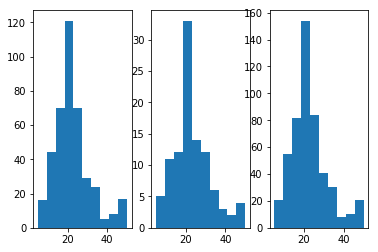

In [29]:
plt.subplot(1,3,1)
plt.hist(y_train)
plt.subplot(1,3,2)
plt.hist(y_test)
plt.subplot(1,3,3)
plt.hist(y_data)

In [30]:
# Linear regression
# import the model
from sklearn.linear_model import LinearRegression
# Create an instance for the model
LR = LinearRegression()
# Training the model 
LR.fit(x_train,y_train)
# Predict the output
LR.predict(x_test)

array([18.0288954 , 28.26825602, 25.54039547,  9.44997165, 24.78924546,
       17.11960855, 31.41122578, 13.86791971, 27.02292838, 26.00492245,
       11.24877824,  4.70586634, 28.65371457, 30.32403498, -2.58819556,
       19.57072963, 25.75783363, 26.45956587,  5.35818082,  4.48842818,
       29.75078893, 22.09103557, 30.30426788, 25.17470402, 30.0275284 ,
        0.9303492 , 18.01901185, 28.3967422 , 30.13624748, 29.96822709,
       31.2827396 , 23.62298624, 28.53511194, 26.98339417, 27.18106522,
       28.42639286, 17.93005988, 30.77867841, 24.18634875, 27.90256457,
       26.3706139 , 25.95550468, 31.25308894, 25.52062836, 18.98760002,
       30.66995933, 28.43627641, 19.94630463, 22.0020836 , 17.56436843,
       27.49733891, 24.09739677,  8.43196572, 25.43167639, 20.66780398,
       28.72289944, 16.15102039, 24.94738231, 18.83934673, 21.94278228,
       20.95442701, 11.23889469, 22.65439808, 26.42991521, 21.76487833,
       -1.60972384, 26.9339764 , 29.09847445,  8.84707493, 30.29

In [31]:
y_pred = LR.predict(x_test)

In [32]:
y_pred

array([18.0288954 , 28.26825602, 25.54039547,  9.44997165, 24.78924546,
       17.11960855, 31.41122578, 13.86791971, 27.02292838, 26.00492245,
       11.24877824,  4.70586634, 28.65371457, 30.32403498, -2.58819556,
       19.57072963, 25.75783363, 26.45956587,  5.35818082,  4.48842818,
       29.75078893, 22.09103557, 30.30426788, 25.17470402, 30.0275284 ,
        0.9303492 , 18.01901185, 28.3967422 , 30.13624748, 29.96822709,
       31.2827396 , 23.62298624, 28.53511194, 26.98339417, 27.18106522,
       28.42639286, 17.93005988, 30.77867841, 24.18634875, 27.90256457,
       26.3706139 , 25.95550468, 31.25308894, 25.52062836, 18.98760002,
       30.66995933, 28.43627641, 19.94630463, 22.0020836 , 17.56436843,
       27.49733891, 24.09739677,  8.43196572, 25.43167639, 20.66780398,
       28.72289944, 16.15102039, 24.94738231, 18.83934673, 21.94278228,
       20.95442701, 11.23889469, 22.65439808, 26.42991521, 21.76487833,
       -1.60972384, 26.9339764 , 29.09847445,  8.84707493, 30.29

In [33]:
y_test

390    15.1
334    20.7
289    24.8
416     7.5
77     20.8
478    14.6
98     43.8
467    19.1
335    21.1
173    23.6
489     7.0
398     5.0
347    23.1
65     23.5
374    13.8
109    19.4
340    18.7
293    23.9
8      16.5
48     14.4
231    31.7
270    21.1
191    30.5
71     21.7
298    22.5
141    14.4
395    13.1
198    34.6
303    33.1
193    31.1
       ... 
212    22.4
483    21.8
11     18.9
73     23.4
69     20.9
279    35.1
92     22.9
358    22.7
288    22.3
394    12.7
182    37.9
28     18.4
338    20.6
87     22.2
440    10.5
336    19.5
188    29.8
399     6.3
175    29.4
112    18.8
294    21.7
174    22.6
89     28.7
364    21.9
79     20.3
221    21.7
20     13.6
139    17.8
33     13.1
304    36.1
Name: medv, Length: 102, dtype: float64

In [34]:
# Not the proper way to evaluate Regression model
(y_test == y_pred).sum()

0

In [35]:
mean_squared_error(y_pred,y_test)

46.45357418186122

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.47572451263906235

#### 61% times we are predicting the house price correctly when we use a single column i.e lstat
#### Create a model with single feature rm and target is medv

In [37]:
x_data_rm = data[['rm']]

In [38]:
# train_test_split
x_train_rm,x_test_rm,y_train_rm,y_test_rm = \
        train_test_split(x_data_rm,y_data,test_size =0.2)

In [39]:
# Linear regression
# import the model
from sklearn.linear_model import LinearRegression
# Create an instance for the model
LR = LinearRegression()
# Training the model 
LR.fit(x_train_rm,y_train_rm)
# Predict the output
LR.predict(x_test_rm)

array([16.59181366, 37.10337207, 19.07725907, 25.66678517, 23.90662988,
       21.80151952, 15.99035356, 18.44041896, 17.55591882, 23.12826975,
       26.29478027, 23.65012483, 21.00546939, 23.4732248 , 21.33273445,
       20.21826426, 21.37695945, 21.23543943, 12.89460304, 27.82496553,
       21.36811445, 11.56785282, 16.67141867, 20.73127435, 28.43527063,
       20.12096924, 28.76253568, 18.98880906, 39.96915255, 15.84883353,
       16.88369871, 20.36862929, 19.96175922, 36.19233692, 18.17506892,
       19.66987417, 20.27133427, 23.92431988, 18.52002398, 19.58142415,
       13.93831322, 20.20057426, 19.45759413, 11.24943277, 18.76768402,
       18.35196895, 18.93573905, 17.85664887, 21.93419455, 30.51384598,
       23.93316488, 23.42015479, 17.49400381, 17.28172377, 21.96957455,
       24.34887995, 27.01122539, 17.50284881, 15.25621843, 22.14647458,
       16.2468586 , 31.36296612, 23.86240487, 38.39474229, 19.76716919,
       14.82281336, 22.11993958, 25.10955008, 26.71934034, 27.64

In [40]:
r2_score(LR.predict(x_test_rm),y_test_rm)


-0.20278660119267866

In [41]:
mean_squared_error(LR.predict(x_test_rm),y_test_rm)

45.05757196092813

### LinearRegression with two columns

In [42]:
x_data2 = data[["rm","lstat"]]

In [43]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_data2,y_data,test_size=0.2)
# Create an instance for the model
LR = LinearRegression()
# Training the model 
LR.fit(x_train2,y_train2)
# Predict the output
LR.predict(x_test2)

array([17.92920626, 30.84339601, 32.3977356 , 16.64678409, 32.45158661,
       26.83637309, 15.29168761, 16.82990008, 27.67338177, 29.99993511,
       21.44778426, 13.47503792, 34.21129556, 18.27319925, 20.96741747,
       32.03445642, 24.00151971, 17.11415589, 19.86573425, 15.03880661,
       30.39974823, 18.44238472, 22.80398014, 10.0442971 , 25.23100698,
       32.1501564 , 19.66559049, 27.6698881 , 27.86301072, 20.66992838,
       18.84535405, 18.09452681, 18.48621078, 25.81203344,  7.83092116,
       33.5175334 , 31.10043125, 26.25497825, 17.18968846, 24.0209159 ,
       17.53818287, 22.85666527, 28.28634047, 22.28115946, 23.69330843,
       24.28405331, 24.35313367, 18.84350065, 19.9412697 , 25.28318679,
       33.51008602, 12.75065892, 22.46628986, 21.85695027, 18.66086877,
       22.58424541, 12.56534235, 33.35611157, 20.63518424, 28.18013606,
       26.33364871, 26.58898868, 27.16816462, 24.11000089, 37.44372195,
       19.12549227, 19.95402175, 20.01713113, 21.83043556, 40.30

In [44]:
#mse
mean_squared_error(LR.predict(x_test2),y_test2)

31.174137054177976

In [45]:
r2_score(LR.predict(x_test2),y_test2)

0.2679575671262525

In [46]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Divide the data into tarining and testing for all the below problems
# Apply the Linear regression for entire data
# Check the mse and r2score
# Apply the Linear regression for entire data after scaling - MinMAxScaler
# Check the mse and r2score
# Apply the Linear regression for entire data after scaling - StandardScaler
# Check the mse and r2score
# Take the top five features which has either positive or negative correlation with the medv
# Apply the Linear regression for those five columns data 
# Check the mse and r2score